In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Data source: "Google Stock Data 2024", https://www.kaggle.com/datasets/umerhaddii/google-stock-data-2024

In [245]:
df_google = pd.read_csv('/Users/jahansilverman/Documents/CSVs for Data Science Projects/GOOGL_2004-08-01_2024-12-18.csv', 
                        header=0)

In [246]:
df_google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044


In [247]:
df_google.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [248]:
df_google['Date'] = pd.to_datetime(df_google['Date'])

In [249]:
df_google.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [250]:
df_google.set_index('Date', inplace=True)
df_google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044


In [251]:
df_google['Price Change'] = df_google['Close'] - df_google['Open']
df_google.head()

,Open,High,Low,Close,Adj Close,Volume,Price Change
Date,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924,0.008508
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856,0.182682
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512,-0.033784
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748,-0.159410
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044,0.026026


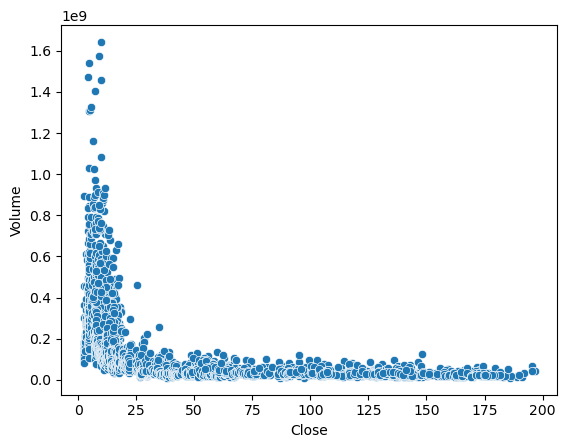

In [252]:
sns.scatterplot(data=df_google, x='Close', y='Volume')
plt.show()

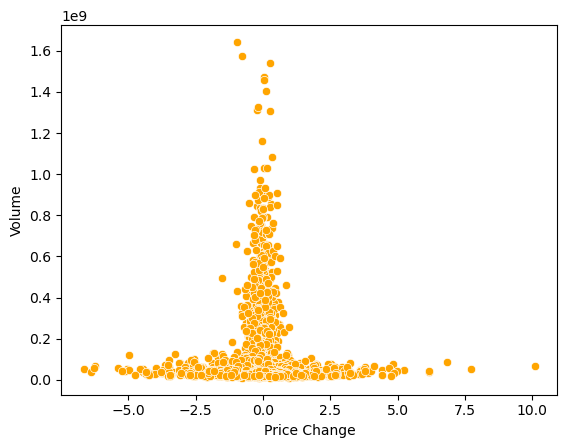

In [253]:
sns.scatterplot(data=df_google, x='Price Change', y='Volume', color='Orange')
plt.show()

In [254]:
df_google['ln(Volume)'] = np.log(df_google['Volume'])
df_google.head()

,Open,High,Low,Close,Adj Close,Volume,Price Change,ln(Volume)
Date,,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924,0.008508,20.610301
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856,0.182682,19.939508
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512,-0.033784,19.715744
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748,-0.159410,19.535648
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044,0.026026,19.029207


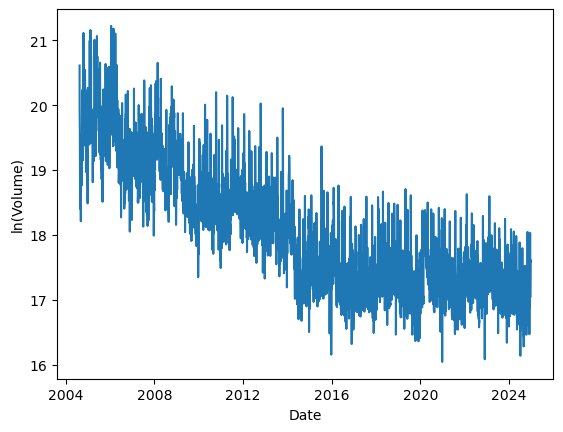

In [255]:
sns.lineplot(x='Date', y='ln(Volume)', data = df_google)
plt.show()

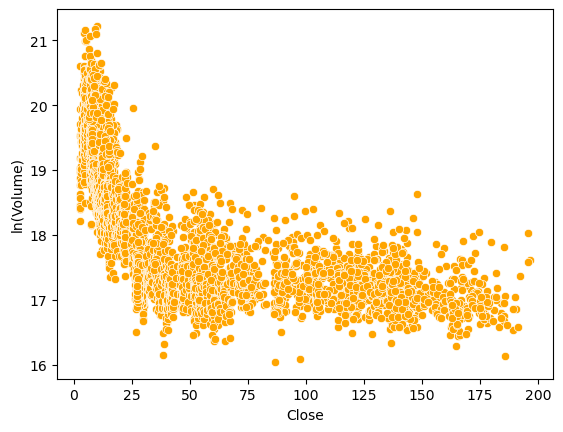

In [256]:
sns.scatterplot(x='Close', y='ln(Volume)', data = df_google, color = 'Orange')
plt.show()

In [257]:
df_google['Price Increase or Decrease'] = np.where(df_google['Price Change'] > 0, 'Price Increase', 
                                                   'Price Decrease')
df_google.head()

,Open,High,Low,Close,Adj Close,Volume,Price Change,ln(Volume),Price Increase or Decrease
Date,,,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924,0.008508,20.610301,Price Increase
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856,0.182682,19.939508,Price Increase
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512,-0.033784,19.715744,Price Decrease
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748,-0.159410,19.535648,Price Decrease
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044,0.026026,19.029207,Price Increase


Price Increase    2583
Price Decrease    2535
Name: Price Increase or Decrease, dtype: int64


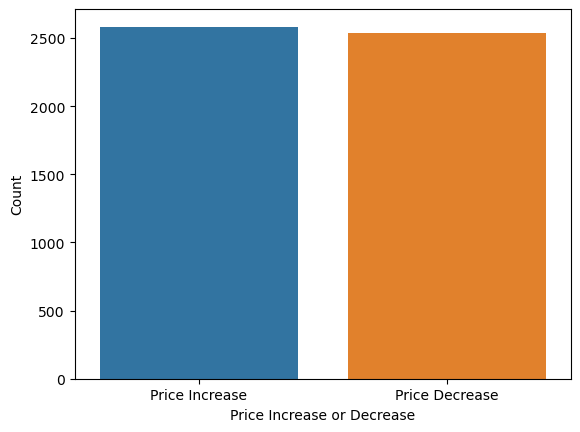

In [258]:
counts = df_google['Price Increase or Decrease'].value_counts()
print(counts)

sns.countplot(data=df_google, x='Price Increase or Decrease')
plt.ylabel('Count')
plt.show()

In [259]:
df_google['Price Increase Ind'] = np.where(df_google['Price Increase or Decrease'] == 'Price Increase', 1, 0)
df_google['Price Decrease Ind'] = np.where(df_google['Price Increase or Decrease'] == 'Price Decrease', 1, 0)
df_google.head()

,Open,High,Low,Close,Adj Close,Volume,Price Change,ln(Volume),Price Increase or Decrease,Price Increase Ind,Price Decrease Ind
Date,,,,,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924,0.008508,20.610301,Price Increase,1,0
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856,0.182682,19.939508,Price Increase,1,0
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512,-0.033784,19.715744,Price Decrease,0,1
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748,-0.159410,19.535648,Price Decrease,0,1
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044,0.026026,19.029207,Price Increase,1,0


In [260]:
x = df_google[['Price Change', 'Open', 'Close', 'High', 'Low', 'Price Increase Ind', 'Price Decrease Ind']]
y = df_google['ln(Volume)']

In [261]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [262]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)
print(x_train)

[[ 0.08809504  0.95732541  0.95916778 ...  0.9642152   0.99464064
  -0.99464064]
 [ 0.40051155 -0.11135264 -0.10342011 ... -0.10316254  0.99464064
  -0.99464064]
 [ 0.01691878 -0.528956   -0.52867299 ... -0.52797962  0.99464064
  -0.99464064]
 ...
 [-0.07180061 -0.722221   -0.72371682 ... -0.72149009 -1.00538823
   1.00538823]
 [ 0.26036513 -0.44731395 -0.44219441 ... -0.44267981  0.99464064
  -0.99464064]
 [-0.36226602 -0.42228878 -0.42951579 ... -0.4245213  -1.00538823
   1.00538823]]


In [263]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [264]:
coeff_df_google = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df_google

,Coefficient
Price Change,0.002680
Open,-0.178703
Close,-0.178667
High,14.731500
Low,-15.012326
Price Increase Ind,-0.005063
Price Decrease Ind,0.005063


In [265]:
y_pred = regressor.predict(x_test)

In [266]:
df_actual_vs_predicted_log_volume = pd.DataFrame({'Actual ln(Volume)': y_test, 'Predicted ln(Volume)': y_pred})
df_actual_vs_predicted_log_volume.head(10)

,Actual ln(Volume),Predicted ln(Volume)
Date,,
2004-10-19,19.707700,18.723287
2014-01-14,18.412696,18.325842
2011-12-23,17.877502,18.442172
2015-02-25,17.525075,18.356762
2009-08-24,18.400864,18.541263
2013-11-29,17.679693,18.260868
2022-04-25,17.646931,17.734114
2019-03-06,16.976842,17.720842
2015-11-25,16.977266,18.056531


In [267]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.55400408405443
Mean Squared Error: 0.46343449011605364
Root Mean Squared Error: 0.6807602295346384


In [268]:
r_squared = regressor.score(x_test, y_test)
print('Coefficient of Determination:', r_squared)

Coefficient of Determination: 0.5077914452979972


In [269]:
print('Intercept:', regressor.intercept_)

Intercept: 18.053042563650227
